# DA Algorithm
### 中田 竜明

In [24]:
include("da.jl")

DA

[ソースコード:da.jl](https://github.com/nswa17/DA_alg.jl/blob/master/da.jl)

In [4]:
m, n = 100, 100
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
DA.check_data(m_prefs, f_prefs)

true

まずm, nそれぞれに100を設定し, ランダムな選好表を作成します. ついでにデータのチェックも行っています.

In [5]:
m_matched, f_matched = DA.call_match(m_prefs, f_prefs)
DA.check_results(m_matched, f_matched)

true

DAアルゴリズムを走らせて結果を得ました. 結果も問題ないようです.

In [25]:
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

きちんと安定マッチングになっています. もちろん次のマッチングは安定ではないので,

In [27]:
DA.stable_matching([1 2], [1 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [16]:
transpose(m_matched)

1x100 Array{Int64,2}:
 90  21  31  20  38  73  96  22  27  61  …  80  44  62  7  9  69  33  66  41

In [17]:
transpose(f_matched)

1x100 Array{Int64,2}:
 63  67  0  23  90  21  6  86  5  32  …  13  0  24  83  94  48  17  79  34

次にスピードを計測します. m,nと繰り返し回数, 再帰かどうかを引数に取る関数をとりあえず作りました. 

In [6]:
function speedtest1(m, n, l, rec)
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    for i in 1:l
        DA.call_match(m_prefs, f_prefs, rec)
    end
end

speedtest1 (generic function with 1 method)

以下の結果を得ました.再帰かそうでないかではコードの一部しか変わっていないのですが, かなり速度差が出ているようです.

当然のことながらメモリ割り当ても再帰のほうが多く, それぞれ１０倍近いようです.
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

次にProfileでどこが遅いかを見てみます. まずは再帰を使わない時から.
```
@profile test1(100, 100, 100, false)
Profile.print()
```

```
244 task.jl; anonymous; line: 447
 244 .../IJulia/src/IJulia.jl; eventloop; line: 143
  244 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   244 loading.jl; include_string; line: 282
    244 profile.jl; anonymous; line: 16
     167 In[167]; test1; line: 3
      2  ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      92 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       66 random.jl; shuffle!; line: 1330
        4  random.jl; call; line: 471
        14 random.jl; call; line: 475
         14 random.jl; maxmultiplemix; line: 445
        10 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        12 random.jl; rand; line: 516
         7 random.jl; gen_rand; line: 88
          7 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        20 random.jl; rand; line: 526
       1  random.jl; shuffle!; line: 1333
      72 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       6  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       4  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  random.jl; call; line: 475
       55 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        16 random.jl; call; line: 475
         16 random.jl; maxmultiplemix; line: 445
        6  random.jl; rand; line: 514
        6  random.jl; rand; line: 516
         2 random.jl; gen_rand; line: 88
          2 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        17 random.jl; rand; line: 526
       3  random.jl; shuffle!; line: 1331
     77  In[167]; test1; line: 4
      6  ...zemi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       2 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      70 ...zemi/DA_alg.jl/da.jl; call_match; line: 57
       70 ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
      1  ...zemi/DA_alg.jl/da.jl; call_match; line: 58
       1 ...zemi/DA_alg.jl/da.jl; convert_pointer_to_list; line: 71
        1 array.jl; findnext; line: 717
```

再帰を使うと...
```
@profile test1(100, 100, 100, true)
Profile.print()
```

```
4    ...a/lib/julia/sys.dylib; ht_keyindex; (unknown line)
4    abstractarray.jl; map; line: 1306
3    array.jl; findin; line: 890
1    array.jl; findnext; line: 715
1    multidimensional.jl; checksize; line: 270
1    random.jl; maxmultiplemix; line: 445
4887 task.jl; anonymous; line: 447
 4887 .../IJulia/src/IJulia.jl; eventloop; line: 143
  4887 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   4887 loading.jl; include_string; line: 282
    4887 profile.jl; anonymous; line: 16
     237  In[167]; test1; line: 3
      2   ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      126 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       92 random.jl; shuffle!; line: 1330
        7  random.jl; call; line: 471
        22 random.jl; call; line: 475
         21 random.jl; maxmultiplemix; line: 445
        14 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        15 random.jl; rand; line: 516
         9 random.jl; gen_rand; line: 88
          9 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        25 random.jl; rand; line: 526
       5  random.jl; shuffle!; line: 1331
       1  random.jl; shuffle!; line: 1333
      108 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  array.jl; copy; line: 100
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       5  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       81 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        22 random.jl; call; line: 475
         22 random.jl; maxmultiplemix; line: 445
        12 random.jl; rand; line: 514
        9  random.jl; rand; line: 516
         4 random.jl; gen_rand; line: 88
          4 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        25 random.jl; rand; line: 526
       7  random.jl; shuffle!; line: 1331
     4650 In[167]; test1; line: 4
      7    ...emi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       3 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      1    ...emi/DA_alg.jl/da.jl; call_match; line: 53
       1 ...a/lib/julia/sys.dylib; call; (unknown line)
        1 .../lib/julia/sys.dylib; call; (unknown line)
      4641 ...emi/DA_alg.jl/da.jl; call_match; line: 57
       70   ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
       38   ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 128
        38 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         25 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          18 array.jl; findin; line: 890
           17 ...lib/julia/sys.dylib; zeros; (unknown line)
            1 ...lib/julia/sys.dylib; call; (unknown line)
          7  array.jl; findin; line: 892
           5 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            1 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         13 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          9 abstractarray.jl; map; line: 1305
           9 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             4 multidimensional.jl; _unsafe_getindex; line: 193
             1 multidimensional.jl; _unsafe_getindex; line: 194
              1 multidimensional.jl; checksize; line: 270
             1 multidimensional.jl; _unsafe_getindex; line: 195
            1 array.jl; findfirst; line: 722
             1 array.jl; findnext; line: 716
          1 abstractarray.jl; map; line: 1306
           1 ...lib/julia/sys.dylib; call; (unknown line)
          2 abstractarray.jl; map; line: 1307
          1 abstractarray.jl; map; line: 1308
       4533 ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 133
(以下長いので略)
```

再帰を使うところで激遅になっている事がわかります. 

------

この後速度を早くするためにアルゴリズムを調整しました.　map関数を書き換えたり...

結果がこちらです.

In [47]:
@time speedtest1(10, 10, 1000, true)
@time speedtest1(10, 10, 1000, false)
@time speedtest1(100, 100, 100, true)
@time speedtest1(100, 100, 100, false)

  0.015843 seconds (87.82 k allocations: 6.862 MB)
  0.012841 seconds (99.07 k allocations: 7.699 MB, 31.03% gc time)
  0.069083 seconds (179.01 k allocations: 73.897 MB, 17.47% gc time)
  0.098331 seconds (250.71 k allocations: 103.273 MB, 22.30% gc time)


参考までに,先ほどの結果は
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

再帰に関して速度が20~80倍ほど早くなってしまいました. 普通のアルゴリズムでも2倍の速度が出ています.

さらに再帰なし版について測ってみます.

In [55]:
for i in 1:40
    @time speedtest1(10*i, 10*i, 1000, false)
end

  0.011899 seconds (103.06 k allocations: 8.035 MB)
  0.083926 seconds (182.12 k allocations: 20.961 MB, 39.56% gc time)
  0.113720 seconds (418.18 k allocations: 66.339 MB, 16.08% gc time)
  0.103693 seconds (538.24 k allocations: 111.943 MB, 26.02% gc time)
  0.128383 seconds (620.30 k allocations: 159.249 MB, 32.59% gc time)
  0.325656 seconds (1.19 M allocations: 306.161 MB, 23.99% gc time)
  0.671633 seconds (2.13 M allocations: 654.740 MB, 27.45% gc time)
  0.902362 seconds (1.79 M allocations: 596.322 MB, 30.71% gc time)
  0.801129 seconds (1.78 M allocations: 673.842 MB, 30.50% gc time)
  0.710953 seconds (2.20 M allocations: 925.490 MB, 21.54% gc time)
  0.825715 seconds (1.82 M allocations: 844.977 MB, 30.03% gc time)
  1.343493 seconds (2.82 M allocations: 1.380 GB, 31.91% gc time)
  2.250089 seconds (3.85 M allocations: 1.945 GB, 27.91% gc time)
  1.230811 seconds (2.76 M allocations: 1.546 GB, 33.10% gc time)
  2.367770 seconds (4.81 M allocations: 2.835 GB, 29.05% gc time

In [124]:
k1 = "0.011899 seconds (103.06 k allocations: 8.035 MB, 00.00% gc time)
  0.083926 seconds (182.12 k allocations: 20.961 MB, 39.56% gc time)
  0.113720 seconds (418.18 k allocations: 66.339 MB, 16.08% gc time)
  0.103693 seconds (538.24 k allocations: 111.943 MB, 26.02% gc time)
  0.128383 seconds (620.30 k allocations: 159.249 MB, 32.59% gc time)
  0.325656 seconds (1.19 M allocations: 306.161 MB, 23.99% gc time)
  0.671633 seconds (2.13 M allocations: 654.740 MB, 27.45% gc time)
  0.902362 seconds (1.79 M allocations: 596.322 MB, 30.71% gc time)
  0.801129 seconds (1.78 M allocations: 673.842 MB, 30.50% gc time)
  0.710953 seconds (2.20 M allocations: 925.490 MB, 21.54% gc time)
  0.825715 seconds (1.82 M allocations: 844.977 MB, 30.03% gc time)
  1.343493 seconds (2.82 M allocations: 1.380 GB, 31.91% gc time)
  2.250089 seconds (3.85 M allocations: 1.945 GB, 27.91% gc time)
  1.230811 seconds (2.76 M allocations: 1.546 GB, 33.10% gc time)
  2.367770 seconds (4.81 M allocations: 2.835 GB, 29.05% gc time)
  2.088936 seconds (4.37 M allocations: 2.635 GB, 30.92% gc time)
  2.039183 seconds (4.00 M allocations: 2.630 GB, 31.90% gc time)
  3.186127 seconds (5.55 M allocations: 4.038 GB, 33.19% gc time)
  4.275009 seconds (6.60 M allocations: 4.794 GB, 31.94% gc time)
  4.211150 seconds (6.72 M allocations: 5.401 GB, 33.72% gc time)
  4.242559 seconds (5.98 M allocations: 4.833 GB, 33.34% gc time)
  5.284978 seconds (7.21 M allocations: 6.542 GB, 34.47% gc time)
  5.283381 seconds (6.67 M allocations: 6.170 GB, 35.90% gc time)
  7.405871 seconds (10.34 M allocations: 9.225 GB, 31.24% gc time)
  6.292878 seconds (8.67 M allocations: 8.140 GB, 27.91% gc time)
  9.541288 seconds (12.81 M allocations: 12.578 GB, 28.33% gc time)
  8.344608 seconds (9.87 M allocations: 10.008 GB, 26.33% gc time)
  6.565481 seconds (8.74 M allocations: 9.239 GB, 27.38% gc time)
  8.904874 seconds (11.61 M allocations: 12.770 GB, 27.77% gc time)
  9.573885 seconds (11.42 M allocations: 12.707 GB, 25.14% gc time)
 10.647101 seconds (12.04 M allocations: 14.096 GB, 27.95% gc time)
 12.162440 seconds (13.48 M allocations: 16.327 GB, 27.73% gc time)
 11.021183 seconds (11.44 M allocations: 13.809 GB, 23.92% gc time)
 16.251917 seconds (17.36 M allocations: 22.070 GB, 26.10% gc time)
 15.830296 seconds (14.39 M allocations: 18.789 GB, 23.84% gc time)
 13.560879 seconds (12.61 M allocations: 16.999 GB, 24.38% gc time)
 18.137202 seconds (17.44 M allocations: 23.547 GB, 22.36% gc time)
 16.665950 seconds (15.73 M allocations: 21.845 GB, 23.12% gc time)
 17.161361 seconds (16.75 M allocations: 24.060 GB, 23.38% gc time)
 22.162160 seconds (20.61 M allocations: 30.251 GB, 22.94% gc time)"

function get_seconds(s::AbstractString)
    return matchall(r"\d+\.\d{6}", s)
end

get_seconds (generic function with 1 method)

得たデータをプロットしてみます.

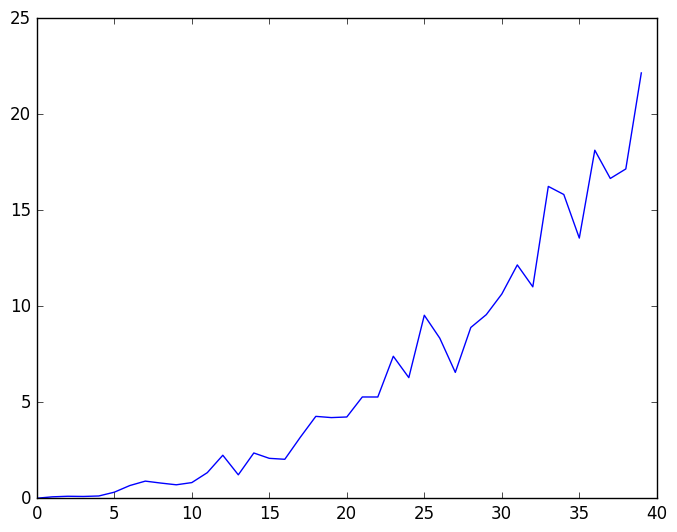

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3138313c8>

In [125]:
using PyPlot

plot(get_seconds(k1))

たまたまの可能性がありますがDAアルゴリズムの計算量$n^2$を表してるように見えなくもない(?). 

In [126]:
for i in 1:40
    @time speedtest1(1*i, 1*i, 1000, false)
end

  0.001232 seconds (16.01 k allocations: 844.313 KB)
  0.001386 seconds (27.02 k allocations: 1.329 MB)
  0.008722 seconds (22.03 k allocations: 1.268 MB, 86.22% gc time)
  0.001670 seconds (29.03 k allocations: 1.727 MB)
  0.002497 seconds (47.03 k allocations: 2.826 MB)
  0.002255 seconds (40.04 k allocations: 2.644 MB)
  0.005837 seconds (67.05 k allocations: 4.430 MB)
  0.003987 seconds (55.05 k allocations: 4.019 MB)
  0.004125 seconds (72.06 k allocations: 5.348 MB)
  0.009130 seconds (95.06 k allocations: 7.363 MB, 31.07% gc time)
  0.010953 seconds (136.07 k allocations: 10.279 MB)
  0.013867 seconds (99.08 k allocations: 8.236 MB, 31.58% gc time)
  0.011239 seconds (102.08 k allocations: 8.985 MB)
  0.016078 seconds (134.09 k allocations: 12.801 MB, 23.05% gc time)
  0.024595 seconds (172.09 k allocations: 16.160 MB)
  0.042064 seconds (213.10 k allocations: 21.212 MB, 37.95% gc time)
  0.033504 seconds (180.10 k allocations: 18.421 MB, 17.29% gc time)
  0.034329 seconds (213.

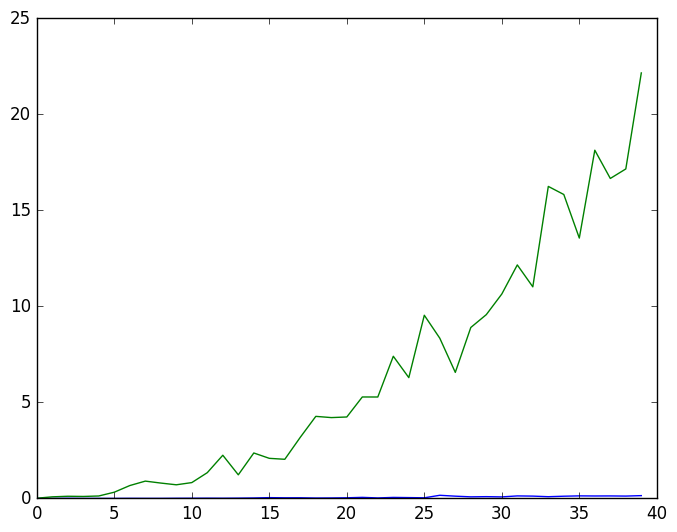

In [127]:
k2 = "0.001232 seconds (16.01 k allocations: 844.313 KB)
  0.001386 seconds (27.02 k allocations: 1.329 MB)
  0.008722 seconds (22.03 k allocations: 1.268 MB, 86.22% gc time)
  0.001670 seconds (29.03 k allocations: 1.727 MB)
  0.002497 seconds (47.03 k allocations: 2.826 MB)
  0.002255 seconds (40.04 k allocations: 2.644 MB)
  0.005837 seconds (67.05 k allocations: 4.430 MB)
  0.003987 seconds (55.05 k allocations: 4.019 MB)
  0.004125 seconds (72.06 k allocations: 5.348 MB)
  0.009130 seconds (95.06 k allocations: 7.363 MB, 31.07% gc time)
  0.010953 seconds (136.07 k allocations: 10.279 MB)
  0.013867 seconds (99.08 k allocations: 8.236 MB, 31.58% gc time)
  0.011239 seconds (102.08 k allocations: 8.985 MB)
  0.016078 seconds (134.09 k allocations: 12.801 MB, 23.05% gc time)
  0.024595 seconds (172.09 k allocations: 16.160 MB)
  0.042064 seconds (213.10 k allocations: 21.212 MB, 37.95% gc time)
  0.033504 seconds (180.10 k allocations: 18.421 MB, 17.29% gc time)
  0.034329 seconds (213.11 k allocations: 22.513 MB, 18.30% gc time)
  0.021761 seconds (186.12 k allocations: 19.021 MB, 24.86% gc time)
  0.025700 seconds (210.12 k allocations: 23.738 MB, 21.16% gc time)
  0.033920 seconds (277.13 k allocations: 32.331 MB, 31.64% gc time)
  0.056235 seconds (379.13 k allocations: 45.410 MB, 24.10% gc time)
  0.027112 seconds (229.14 k allocations: 27.422 MB, 20.24% gc time)
  0.053693 seconds (386.15 k allocations: 61.107 MB, 29.36% gc time)
  0.043951 seconds (277.15 k allocations: 43.424 MB, 28.61% gc time)
  0.033647 seconds (235.16 k allocations: 36.682 MB, 17.09% gc time)
  0.164228 seconds (418.17 k allocations: 65.417 MB, 17.07% gc time)
  0.118690 seconds (369.17 k allocations: 58.568 MB, 33.72% gc time)
  0.083083 seconds (427.18 k allocations: 67.695 MB, 24.85% gc time)
  0.093146 seconds (496.18 k allocations: 74.853 MB, 24.65% gc time)
  0.080496 seconds (279.19 k allocations: 44.994 MB, 29.43% gc time)
  0.131848 seconds (414.19 k allocations: 75.323 MB, 21.68% gc time)
  0.121672 seconds (493.20 k allocations: 89.715 MB, 28.97% gc time)
  0.090460 seconds (451.21 k allocations: 82.485 MB, 26.21% gc time)
  0.116191 seconds (621.21 k allocations: 113.280 MB, 25.54% gc time)
  0.133970 seconds (619.22 k allocations: 115.083 MB, 28.09% gc time)
  0.128574 seconds (610.23 k allocations: 114.216 MB, 29.64% gc time)
  0.131007 seconds (652.23 k allocations: 119.987 MB, 24.16% gc time)
  0.123505 seconds (580.24 k allocations: 109.369 MB, 30.23% gc time)
  0.146922 seconds (686.24 k allocations: 143.040 MB, 28.83% gc time)"

plot(get_seconds(k2))
plot(get_seconds(k1))
legend()